In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


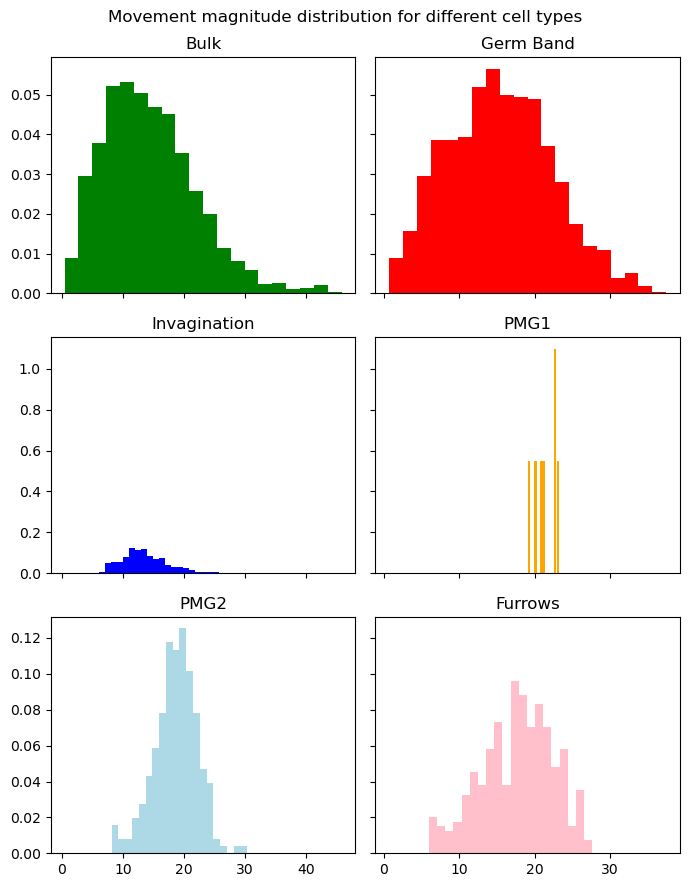

In [3]:
with h5py.File("runs/gradual_l3_startx_9.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])


movement_magnitudes = np.linalg.norm(poss[-1] - poss[0], axis=1)


cell_names = ["Bulk", "Germ Band", "Invagination", "PMG1", "PMG2", "Furrows"]
colors = ["green", "red", "blue", "orange", "lightblue", "pink"]

fig, axs = plt.subplots(3, 2, figsize=(7, 9), sharex="col", sharey="row")

axs = axs.flatten()


for i, cell_type in enumerate(np.unique(cell_properties)):
    axs[i].hist(movement_magnitudes[cell_properties == cell_type], bins=20, alpha=1, label=f"Cell type {cell_type}", density=True, color=colors[i])
    # .xlabel("Movement magnitude")
    axs[i].set_title(cell_names[int(cell_type)])

fig.suptitle("Movement magnitude distribution for different cell types")

fig.tight_layout()

plt.show()

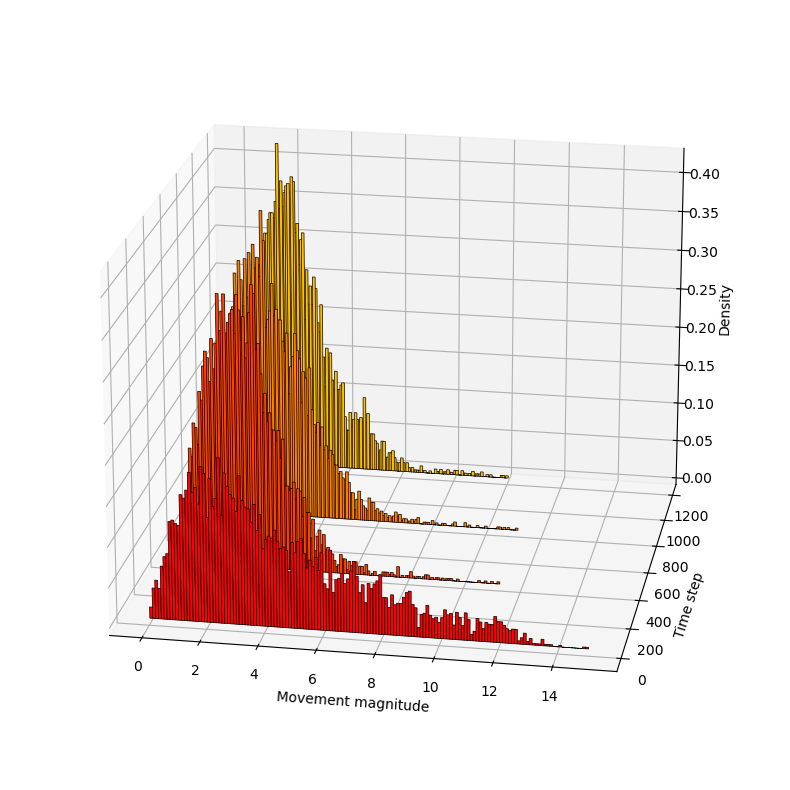

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


cell_type = 1

every = 400



for t in range(1, len(poss)-every, every):
    movement_magnitudes = np.linalg.norm(poss[t + 200] - poss[t], axis=1)

    correct_type = movement_magnitudes#[cell_properties == cell_type]

    bins, edges = np.histogram(correct_type, bins=150, density=True)

    ax.bar(edges[:-1], bins, zs=t, zdir='y', alpha=1, color=(1,t/(len(poss)-every), 0), width=0.1, edgecolor = "black", linewidth=.5)

ax.set_xlabel("Movement magnitude")
ax.set_ylabel("Time step")
ax.set_zlabel("Density")

# change the view angle
ax.view_init(elev=20, azim=-80)



1) Convince stas
2) Make 3d hist
3) Germ band length
4) make clustering on movements

